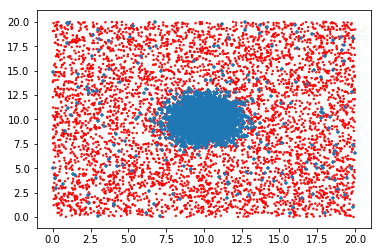

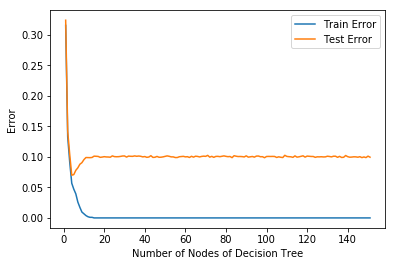

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

max_depth = np.arange(1, 152)

# parameters for random funtion
center = 10
standard_dev = 1
gaussian_size = [5000, 2]

lower_bound = 0
upper_bound = 20
noise_size = [200, 2]

# Gaussian distribution
gaussian_list = np.random.normal(center, standard_dev, gaussian_size)
x_axis_gaussian = gaussian_list[:,0]
y_axis_gaussian = gaussian_list[:,1]

# noise function
gaussian_noise_points = np.random.uniform(lower_bound, upper_bound, noise_size)
x_axis_gaussian = np.append(x_axis_gaussian, gaussian_noise_points[:,0])
y_axis_gaussian = np.append(y_axis_gaussian, gaussian_noise_points[:,1])
label_arr_gauss = np.array([])

# create labels
for i in range(0, 5200):
  label_arr_gauss = np.append(label_arr_gauss, "+")

# uniform distribution
uniform_size = [5200, 2]
uniform_points = np.random.uniform(lower_bound, upper_bound, uniform_size)
x_axis_n = uniform_points[:,0]
y_axis_n = uniform_points[:,1]

# create labels
label_unif = np.array([])
for i in range(0, 5200):
  label_unif = np.append(label_unif, "o")

# scatter plot of data
plt.scatter(x_axis_n, y_axis_n, s=2, facecolors='none', edgecolors='r')
plt.scatter(x_axis_gaussian, y_axis_gaussian, s=10, marker="+")

plt.show()

x_axis = x_axis_gaussian
x_axis = np.append(x_axis, x_axis_n)

y_axis = y_axis_gaussian
y_axis = np.append(y_axis, y_axis_n)

labels = label_gauss
labels = np.append(labels, label_unif)

# define the column labels of dataframe
data = {'x_col': x_axis, 'y_col': y_axis, 'class_label': labels}

# create the dataframe
dataframe = DataFrame(data)

# assign data to dataframe
Y = dataframe['class_label']
X = dataframe.drop(['class_label'], axis=1)

# reset index
dataframe = dataframe.sample(frac=1).reset_index(drop=True)

# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9)

train_acc = np.zeros(len(max_depth))
test_acc = np.zeros(len(max_depth))

# train the decision tree for different depth
for depth in max_depth:
  clf = tree.DecisionTreeClassifier(max_depth=depth)
  clf = clf.fit(X_train, Y_train)
  pred_train = clf.predict(X_train)
  pred_test = clf.predict(X_test)
  train_acc[depth-1] = accuracy_score(Y_train, pred_train)
  test_acc[depth-1] = accuracy_score(Y_test, pred_test)

# plot the trees
plt.plot(max_depth, 1-train_acc, max_depth, 1-test_acc)
plt.legend(['Train Error', 'Test Error'])
plt.xlabel("Number of Nodes of Decision Tree")
plt.ylabel('Error')


plt.show()
